# Mini-projeto - SOMPY

## Introdução

Este diário do Jupyter é referente ao mini-projeto da disciplina de Redes Neurais envolvendo o uso de mapas auto-organizáveis, ou, do inglês *Self-organizing maps* (*SOM*) utilizando linguagem Python e seguindo o roteiro proposto em https://towardsdatascience.com/analyzing-climate-patterns-with-self-organizing-maps-soms-8d4ef322705b .
 
**Equipe:<br><br>
Pedro Beltran ([@pedrovbeltran](https://github.com/pedrovbeltran))<br>
Luana Silva ([@luanaleticia](https://github.com/luana-leticia))
**

## Dia 1

Seguindo o roteiro proposto, precisamos instalar o módulo SOMPY no computador, clonando o repositório https://github.com/hhl60492/SOMPY_robust_clustering e tentando instalar o módulo pela primeira vez se produziram alguns erros relativos às funções do módulo que estavam incompatíveis com o programa modificado (o repositório foi clonado e então modificado por outro usuário para esse projeto específico). Além é claro de aparecerem muitos erros devido a outros módulos requeridos pelo SOMPY e também devido à API do Google Maps que o projeto usa.

## Dia 2

Depois de exaustiva busca na internet por respostas e pela análise do problema verificamos que o problema ocorreu devido a um conflito da instalação do SOMPY com os arquivos que foram gerados no computador do usuário que fez as modificações e que estavam no repositório (o dono do repositório já foi avisado desse erro e já foi feito um *pull-request* para corrigí-lo). Então, com o problema resolvido, o código corrigido e o módulo instalado de acordo com o roteiro proposto, chegou a hora de testar a execução do programa.

In [1]:
import numpy as np
from sompy.sompy import SOMFactory
import pandas as pd
import glob
import os


# read in all csvs from folder
path = '/home/pedro/Prog/RN/SOM/Diário/SOMPY_robust_clustering/data' # Here you put your unique path to the folder
all_files = glob.glob(os.path.join(path, "*.csv"))

# concat into one df
df_from_each_file = (pd.read_csv(f, skiprows = 31) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)

# get columns Lat, Long, Mean Temp, Max Temp, Min temp, Precipitation
data = concatenated_df[['Lat', 'Long', 'Tm', 'Tx', 'Tn', 'P']]
data = data.apply(pd.to_numeric,  errors='coerce')
data = data.dropna(how='any')
names = ['Latitude', "longitude", 'Monthly Median temperature (C)','Monthly Max temperature (C)', 'Monthly Min temperature (C)', 'Monthly total precipitation (mm)']

print(data.head())

CACHEDIR=/home/pedro/.cache/matplotlib
Using fontManager instance from /home/pedro/.cache/matplotlib/fontlist-v300.json
Loaded backend module://ipykernel.pylab.backend_inline version unknown.


      Lat     Long    Tm    Tx   Tn      P
0  48.935 -123.742  16.7  28.0  7.0   75.1
1  48.824 -124.133  16.5  32.0  6.0  169.4
2  48.829 -124.052  17.8  33.5  5.0  108.2
4  48.735 -123.728  16.1  30.0  5.0   68.2
5  48.432 -123.439  13.6  21.4  7.1   32.2


Vemos então que, nessa primeira parte de programa temos apenas a aquisição dos dados que serão usados no decorrer do programa

In [2]:
# create the SOM network and train it. You can experiment with different normalizations and initializations
sm = SOMFactory().build(data.values, normalization = 'var', initialization='pca', component_names=names)
sm.train(n_job=1, verbose=False, train_rough_len=2, train_finetune_len=5)

# The quantization error: average distance between each data vector and its BMU.
# The topographic error: the proportion of all data vectors for which first and second BMUs are not adjacent units.
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.08204911417701087; Quantization error = 0.5591334189558947


Nessa outra parte do programa temos a criação e o treinamento da rede propriamente ditos, usando uma técnica de redução de dimensionalidade não-linear chamada no programa de *PCA* (do inglês *Principal Component Analysis* ou, em pt-br, análise dos componentes principais) que é justamente o que permite que a rede consiga dividir o conjunto de dados em grupos usando o conceito de aprendizado competitivo.

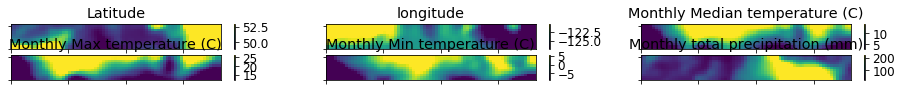

In [12]:
%matplotlib inline

# component planes view
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=12)
view2D.show(sm, col_sz=3, which_dim="all", desnormalize=True)

Acima foram plotados os *heat-maps* e agora plotaremos a *U-matrix* abaixo

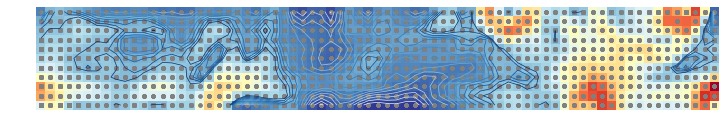

([], array([[0.17101   , 0.23116454, 0.24533124, 0.22949774, 0.21770661,
         0.20036374, 0.18733859, 0.17594128, 0.16888335, 0.17081608,
         0.179856  , 0.18024538, 0.16316524, 0.1561975 , 0.16150178,
         0.15223824, 0.15426053, 0.1790422 , 0.18535112, 0.17833513,
         0.18496521, 0.19487203, 0.17780992, 0.15957557, 0.19448742,
         0.21962513, 0.18238608, 0.13347359, 0.12007647, 0.14001393,
         0.13659246, 0.11644921, 0.1497427 , 0.19695296, 0.17268969,
         0.14608309, 0.18256496, 0.1957851 , 0.17719836, 0.1718088 ,
         0.15256147, 0.16157762, 0.2052846 , 0.24929226, 0.26076729,
         0.20613686, 0.22171548, 0.44699532, 0.54163076, 0.33833997,
         0.23246503, 0.30661374, 0.45499869, 0.44122936, 0.31285007,
         0.28297082, 0.29777041, 0.23356929, 0.25234946, 0.37756061,
         0.36009503, 0.24837065, 0.26033367, 0.31260909, 0.34166208,
         0.33515984, 0.39250419, 0.56448623, 0.53416089, 0.46682508,
         0.61873132, 0.4082576

In [13]:
%matplotlib inline

# U-matrix plot
from sompy.visualization.umatrix import UMatrixView

umat  = UMatrixView(width=10,height=10,title='U-matrix')
umat.show(sm)

Com relação à *U-matrix* obtivemos resultados semelhantes aos obtidos pelo usuário criador do programa. Agora, usando o algoritmo K-médias (ou *K-Means*) temos:

Performing K-means SSE elbow sweep...
Centroid 0[  50.74216379 -125.58091454    7.83619389   16.78749297   -0.49615003
  192.32166128]
Centroid 1[  51.40624278 -122.48384858   12.53476283   25.80398219    1.44769054
   51.79953458]
Centroid 2[  50.2960522  -126.24022499    6.73331897   14.43395857   -1.20455307
  472.26222924]
Centroid 3[ 5.06429429e+01 -1.24324588e+02  8.58473009e+00  1.79580988e+01
 -5.76960494e-02  1.02778751e+02]
Centroid 4[ 5.03821979e+01 -1.25256741e+02  8.16413946e+00  1.73765755e+01
 -1.29155307e-02  2.51888526e+02]
Centroid 5[  50.5310142  -126.18016895    6.44948486   14.35134399   -1.48571274
  335.54350996]
Centroid 6[  50.51099141 -126.49750896    6.89480902   14.84388484   -1.11167982
  576.79955471]
Centroid 7[  49.93821801 -122.41334787   16.62157378   29.74069098    5.93727343
   28.18571188]
Centroid 8[  52.25014564 -121.76140696   -3.85527982    8.29986658  -20.09853432
   43.7610516 ]
Centroid 9[  50.58058276 -125.32572193    7.85319207   17.1723665

/home/pedro/anaconda3/envs/idp/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


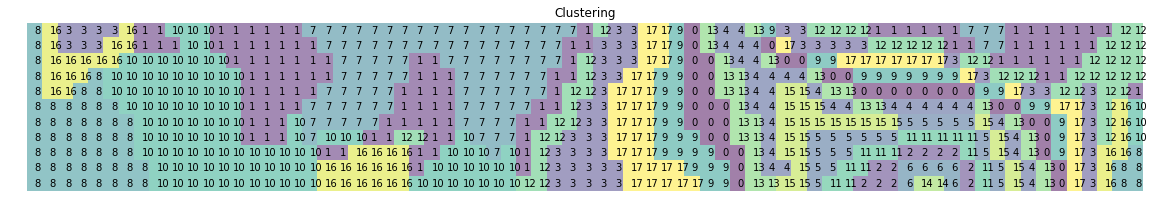

In [14]:
# do the K-means clustering on the SOM grid, sweep across k = 2 to 20
from sompy.visualization.hitmap import HitMapView
K = 20 # stop at this k for SSE sweep
K_opt = 18 # optimal K already found
[labels, km, norm_data] = sm.cluster(K,K_opt)
hits  = HitMapView(20,20,"Clustering",text_size=12)
a=hits.show(sm)

Observamos acima que obtemos a posição dos centróides de cada grupo formado pela rede. Plotando agora essas centroides no *Google Maps* temos:

In [16]:
import gmplot

gmap = gmplot.GoogleMapPlotter(54.2, -124.875224, 6)
j = 0
for i in km.cluster_centers_:
    gmap.marker(i[0],i[1],'red', title="Centroid " + str(j))
    j += 1

gmap.draw("centroids_map.html")

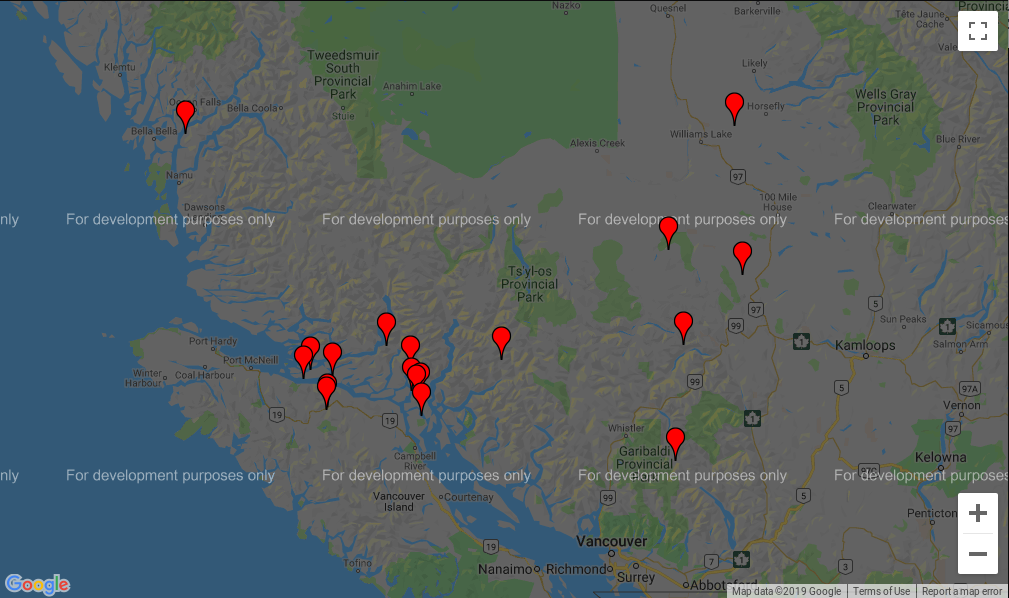

In [17]:
from IPython.display import Image
Image("centroids_map.png")

Pela figura acima verificamos os centróides gerados pela execução do algoritmo, que são bem semelhantes aos gerados pelo criador do programa.

Como visto anteriormente temos alguns pontos a se trabalhar no programa tais como a modificação da biblioteca gmplot a qual o criador do programa também modificou e não encontramos um jeito de modificar também (ainda) além de um erro ao plotar os *heat-maps*, onde provavelmente será um erro de configuração (altura e largura), coisa que também terá de ser corrigida em um momento posterior

## Dia 3

Hoje farei alguns testes apenas para consertar um pequeno erro que ocorreu com a matplotlib que não está maximizando automaticamente os plots dos *heatmaps* como pudemos notar no dia anterior.

Depois de um pequeno teste usando a "função mágica" (*magic function*) %matplotlib notebook obtivemos uma imagem que já foi plotada mazimizada. O resultado está logo abaixo.

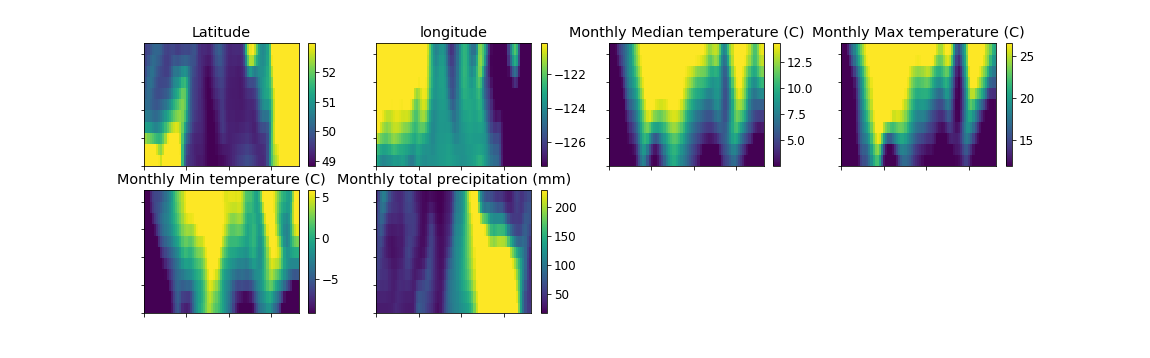

In [1]:
from IPython.display import Image
Image("heatmap.png")

Depois apenas faltava o conserto do pequeno problema da API do Google Maps que por algum motivo o plot dos centróides não estava igual ao do artigo. Após uma análise rápida, percebeu-se que era devido ao módulo gmplot que o autor do artigo e criador do programa tinha modificado para incluir o nome dos centróides. Após a modificação obteu-se o seguinte resultado:

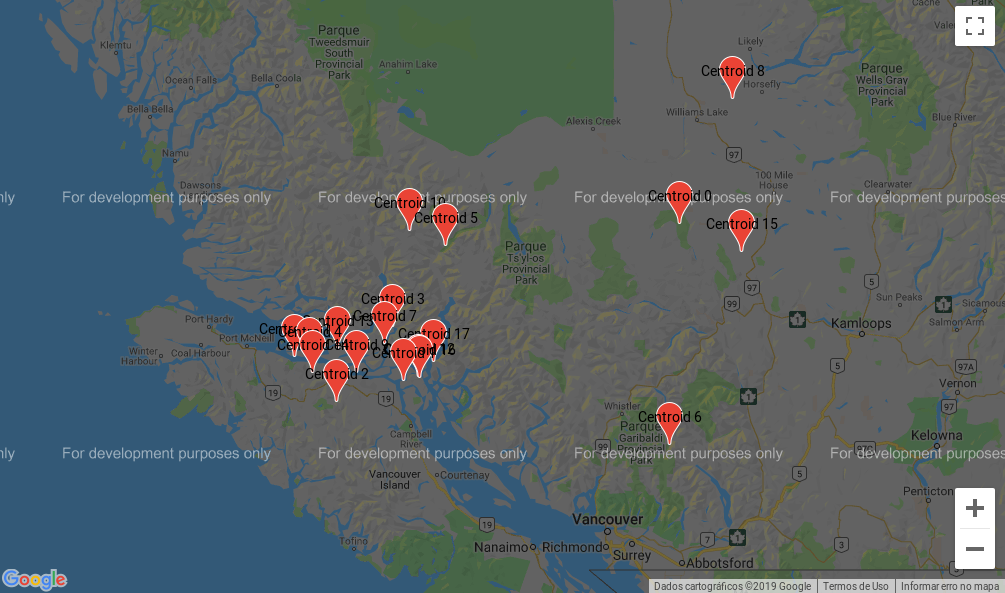

In [2]:
from IPython.display import Image
Image("new_centroids_map.png")

Agora sim obtivemos os resultados esperados. Com isso podemos chegar a algumas conclusões importantes principalmente com relação aos métodos usados, à matriz U (*U-matrix*), aos termos usados no decorrer do programa tais como erro de quantização e erro topográfico e, principalmente, com relação aos grupos (*clusters*) encontrados e qual a interpretação que podemos ter (baseados também nos *heatmaps*) dos resultados.

# Conslusões

Aqui escreveremos as conclusões